In [70]:
import transformers
from transformers import CLIPTokenizer, CLIPTextModel, CLIPProcessor, CLIPModel
transformers.logging.set_verbosity_error()


In [71]:
tokenizer = CLIPTokenizer.from_pretrained(
    "openai/clip-vit-large-patch14",
    cache_dir="data/models/openai/clip-vit-large-patch14",
    local_files_only=True,
)
text_model = CLIPTextModel.from_pretrained(
    "openai/clip-vit-large-patch14", 
    cache_dir="data/models/openai/clip-vit-large-patch14",
    local_files_only=True,
)

In [84]:
def embed(text):
    input_ids = tokenizer(text, return_tensors="pt").input_ids
    tensor = text_model(input_ids).pooler_output
    return tensor.squeeze().detach().numpy()

In [246]:
objects = ["horse", "cow", "elephant", "giraffe", "zebra", "lion", "tiger", "bear", "monkey", "wolf", "fox", "sheep", "goat", "pig", "mouse", "rat", "rabbit"] 
# objects = ["cat", "dog", "cow"]
modifiers = {
    "default": "",
    "high": "high resolution",
    # "ultra": "ultra high resolution",
}
mod_colors = {
    "default": "tab:blue",
    "high": "tab:orange",
    # "ultra": "tab:green",
}

In [ ]:
embeddings = {}
for mod_name, mod in modifiers.items():
    embeddings[mod_name] = {}
    for obj in objects:
        emb = embed(f"a {mod} photo of a {obj}")
        embeddings[mod_name][obj] = emb

In [259]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, init="random", perplexity=30, learning_rate='auto')
v = np.vstack([embeddings[mod][obj] for mod in modifiers for obj in objects])
result = tsne.fit_transform(v)

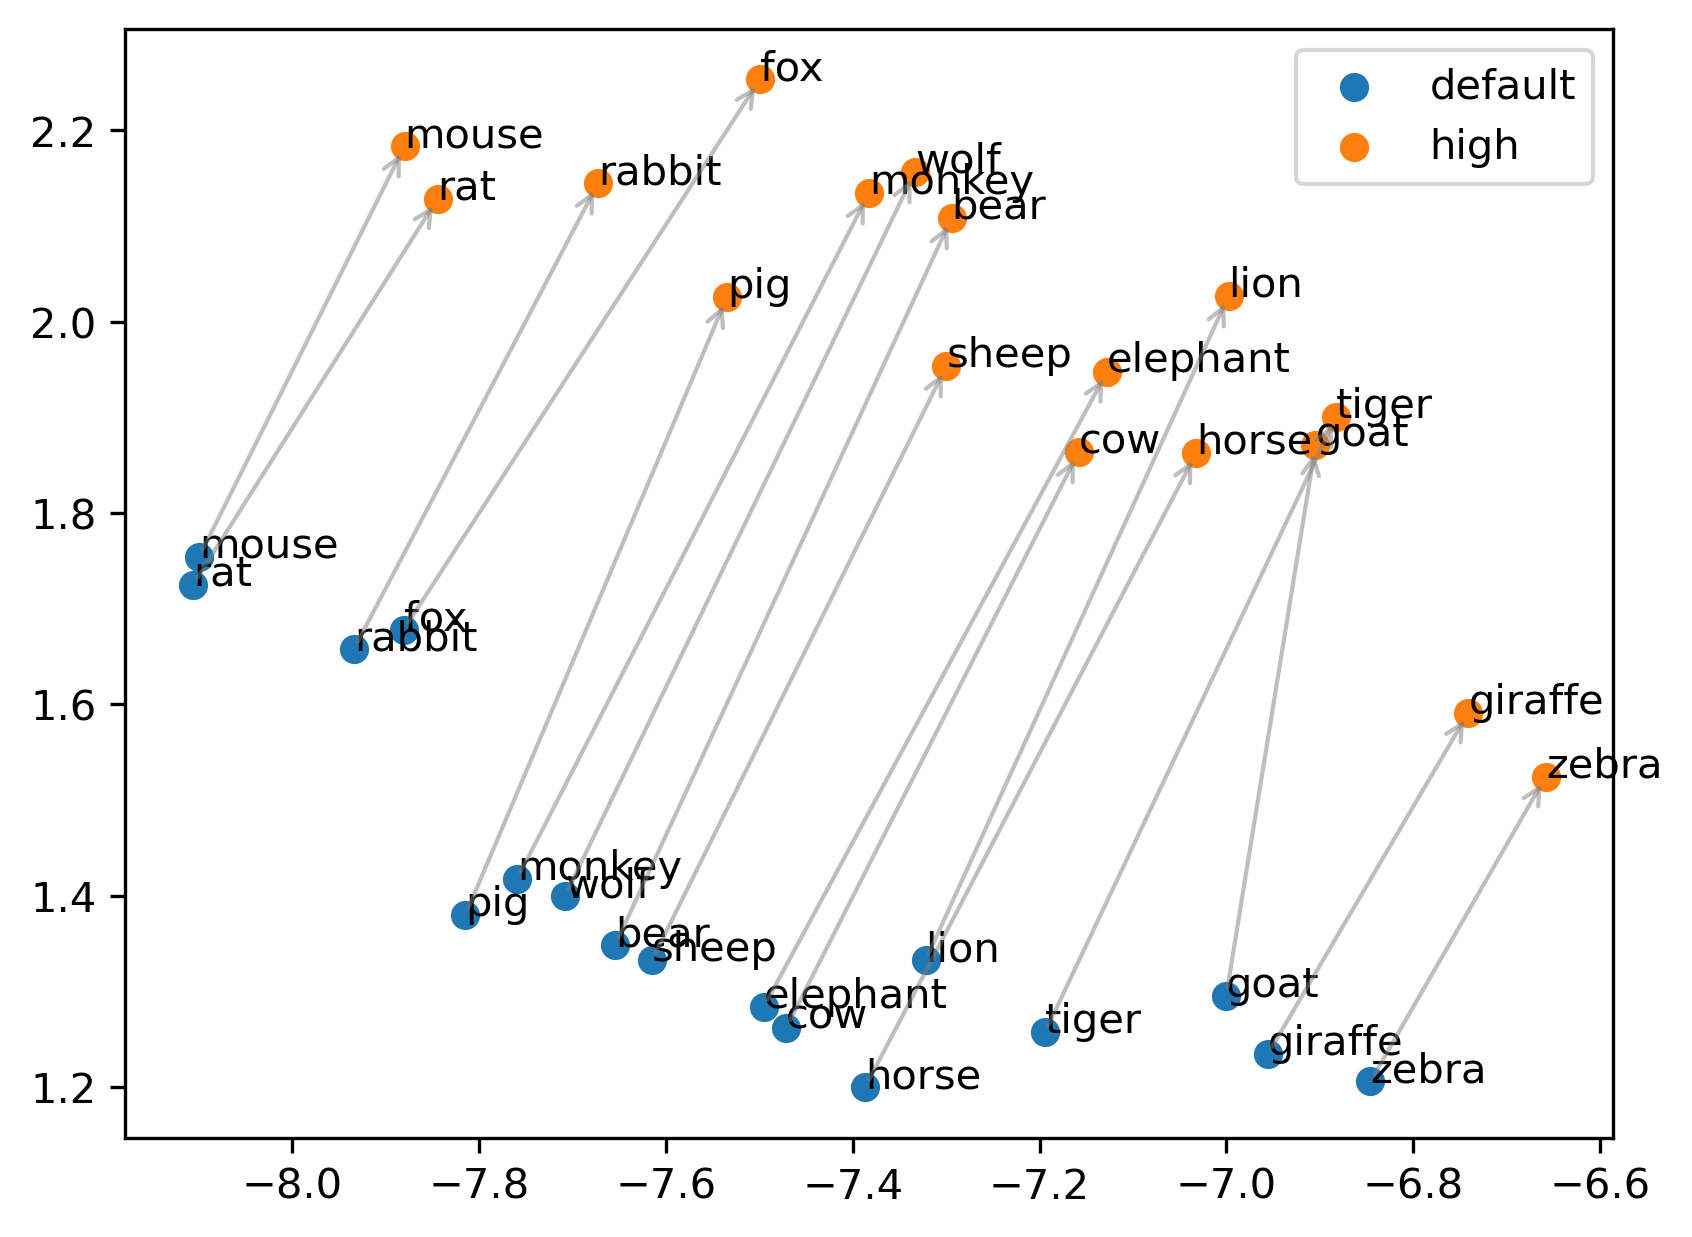

In [262]:

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

for i, (mod_name, mod) in enumerate(modifiers.items()):
    xys = result[i*len(objects):(i+1)*len(objects)]
    plt.scatter(xys[:, 0], xys[:, 1], label=mod_name, color=mod_colors[mod_name])
    for j, obj in enumerate(objects):
        plt.annotate(obj, (xys[j, 0], xys[j, 1]))

for i, obj in enumerate(objects):
    plt.annotate("", 
        (result[i+len(objects), 0], result[i+len(objects), 1]), 
        xytext=(result[i, 0], result[i, 1]), 
        arrowprops=dict(arrowstyle="->", color="tab:gray", alpha=0.5)
    )

plt.legend()
plt.show()
